<img src="https://github.com/djp840/MSDS_432_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS432 - Assignment 07 - Implement Dijkstra's Algorithm

### Import Packages

In [1]:
import networkx  as nx 
import matplotlib.pyplot as plt
G = nx.Graph()
%matplotlib inline

<div class="alert alert-block alert-info">
    <b>Networkx is used to depict the graphs</b><br> 
    https://networkx.github.io/
    </div>

### Mount Google Drive to Colab Environment

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Create Graph

In [2]:
trip = nx.Graph()
# Add nodes
G.add_nodes_from(['NYC', 'DC', 'Atlanta', 'New Orleans', 'Dallas',
          'Indianapolis', 'Kansas City', 'Denver', 'Pittsburg', 
          'Cincinnati', 'St Louis', 'Oklahoma City' 'Salt Lake City',
          'Albuquerque', 'Phoenix', 'Las Vegas', 'San Diego', 'Los Angeles'])

### Add Edges with Weights (distance in hours)

In [3]:
trip.add_edge('NYC', 'DC', weight=2)
trip.add_edge('DC', 'Atlanta', weight=2)
trip.add_edge('Atlanta', 'New Orleans', weight=2)
trip.add_edge('New Orleans', 'Dallas', weight=2)
trip.add_edge('Dallas', 'Alburquerque', weight=2)
trip.add_edge('Alburquerque', 'Phoenix', weight=2)
trip.add_edge('NYC', 'Indianapolis', weight=11)
trip.add_edge('Indianapolis', 'Kansas City', weight=8)
trip.add_edge('Kansas City', 'Denver', weight=7)
trip.add_edge('Denver', 'Salt Lake City', weight=6)
trip.add_edge('Salt Lake City', 'Las Vegas', weight=9)
trip.add_edge('NYC', 'Pittsburg', weight=7)
trip.add_edge('Pittsburg', 'Cincinnati', weight=6)
trip.add_edge('Cincinnati', 'St Louis', weight=8)
trip.add_edge('St Louis', 'Oklahoma City', weight=7)
trip.add_edge('Oklahoma City', 'Alburquerque', weight=9)
trip.add_edge('Phoenix', 'San Diego', weight=5)
trip.add_edge('Phoenix', 'Las Vegas', weight=2)
trip.add_edge('Las Vegas', 'San Diego', weight=2)
trip.add_edge('Las Vegas', 'Los Angeles', weight=5)
trip.add_edge('San Diego', 'Los Angeles', weight=2)

### Show Visual of Graph

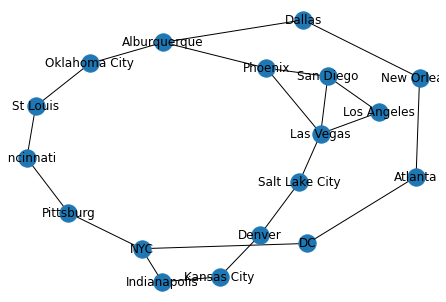

In [4]:
nx.draw(trip, with_labels=True)

### Define Starting Location and Destination

In [5]:
source = 'NYC'
dest = 'Los Angeles'

### Track Total Distance Traveled

In [6]:
bfs_length = 0

# Iterate through breadth-first search 
for route_start, route_stop in list(nx.bfs_edges(trip, source)):
    length = trip.get_edge_data(route_start, route_stop)['weight']
    bfs_length += length
    print('{0} -> {1} : \t{2} hours'.format(route_start, 
                                            route_stop, length))

NYC -> DC : 	2 hours
NYC -> Indianapolis : 	11 hours
NYC -> Pittsburg : 	7 hours
DC -> Atlanta : 	2 hours
Indianapolis -> Kansas City : 	8 hours
Pittsburg -> Cincinnati : 	6 hours
Atlanta -> New Orleans : 	2 hours
Kansas City -> Denver : 	7 hours
Cincinnati -> St Louis : 	8 hours
New Orleans -> Dallas : 	2 hours
Denver -> Salt Lake City : 	6 hours
St Louis -> Oklahoma City : 	7 hours
Dallas -> Alburquerque : 	2 hours
Salt Lake City -> Las Vegas : 	9 hours
Alburquerque -> Phoenix : 	2 hours
Las Vegas -> San Diego : 	2 hours
Las Vegas -> Los Angeles : 	5 hours


In [7]:
print('BFS trip length', bfs_length)

BFS trip length 88


### Tree constructed from a Breadth-First Search Starting at Source
Unfortunately, to get to LA, the BFS needs to visit all nodes in the graph

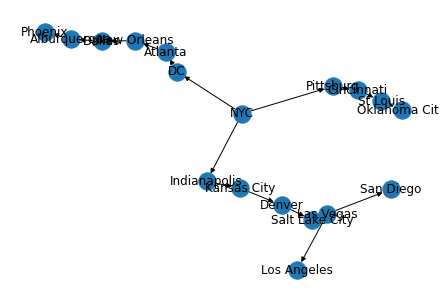

In [8]:
nx.draw(nx.bfs_tree(trip, source), with_labels=True)

### Dijkstra's Algorithm 

Then use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes)

In [9]:
d_length = nx.dijkstra_path_length(trip, source, dest)
print('Dijkstra\'s trip length: ', d_length)

Dijkstra's trip length:  18


In [10]:
ideal_route = nx.dijkstra_path(trip, source, dest)
ideal_route

['NYC',
 'DC',
 'Atlanta',
 'New Orleans',
 'Dallas',
 'Alburquerque',
 'Phoenix',
 'Las Vegas',
 'San Diego',
 'Los Angeles']

### Show Visual of Sub-Graph

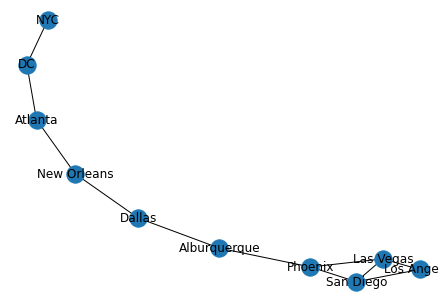

In [11]:
nx.draw(trip.subgraph(ideal_route), with_labels=True)

### Plot Trip Lengths

Text(0.5, 1.0, 'Comparison of trip length from NYC to LA using different algorithms')

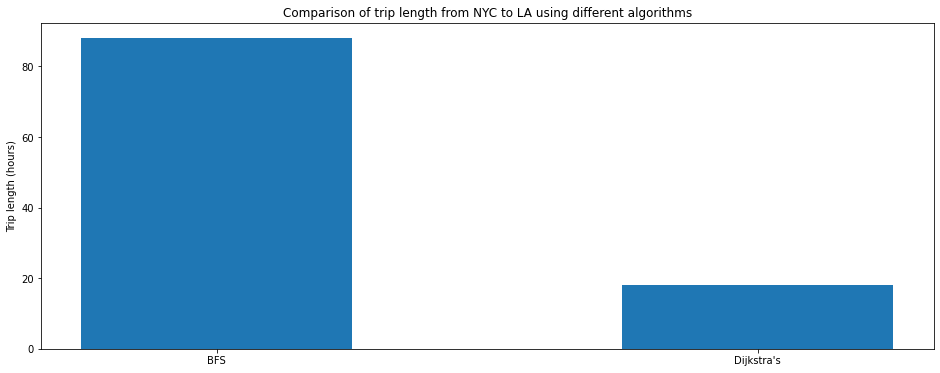

In [12]:
plt.figure(figsize=(16, 6))
plt.bar([1,2], [bfs_length, d_length], width=0.5, 
        tick_label=['BFS', 'Dijkstra\'s'])
plt.ylabel('Trip length (hours)')
plt.title('Comparison of trip length from NYC to LA using different algorithms')